<a href="https://colab.research.google.com/github/Myst-Lee/Advanced-Machine-Learning/blob/main/WOA7015_GroupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'pandas'

# **Data Exploration**

In [2]:
diabetes_df = pd.read_csv("synthetic_diabetes.csv")

In [ ]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
import plotly.graph_objects as go

In [ ]:
colors = ['mediumseagreen', 'salmon']
labels = ['0 - no diabetes','1 - diabetes']
values = diabetes_df['Outcome'].value_counts()/diabetes_df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.update_layout(
    title_text="Checking Target Imbalance",
    width=500,  # Set a smaller width
    height=400  # Set a smaller height
    )
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes_df.shape

NameError: name 'diabetes_df' is not defined

In [ ]:
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: title={'center': 'Health-Unhealthy Ratio'}, xlabel='Outcome', ylabel='count'>

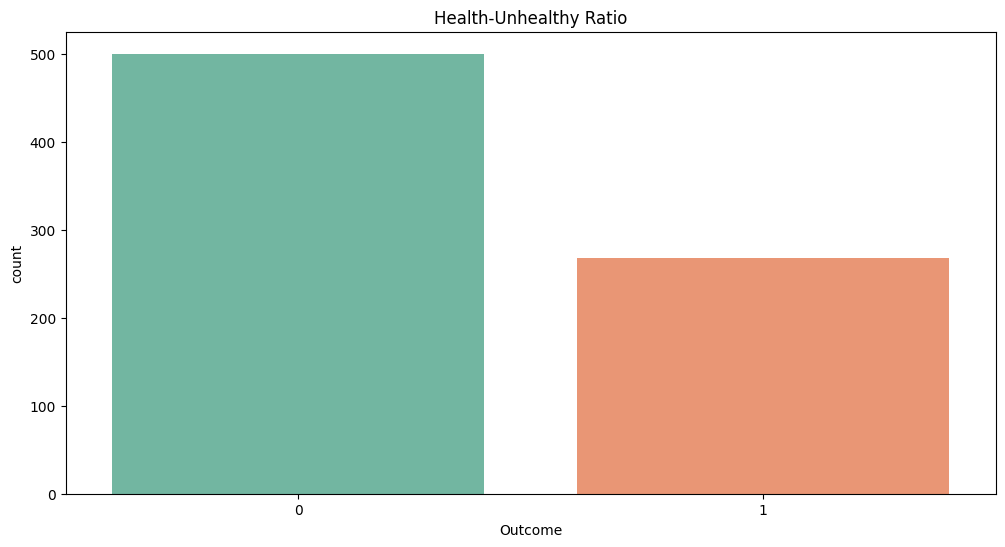

In [ ]:
plt.figure(figsize = (12,6))
plt.title('Health-Unhealthy Ratio')
sns.countplot(x = "Outcome" , data = diabetes_df, palette="Set2", legend=False, hue='Outcome')

Text(0.5, 0.98, 'Diabetes Parameter Histogram')

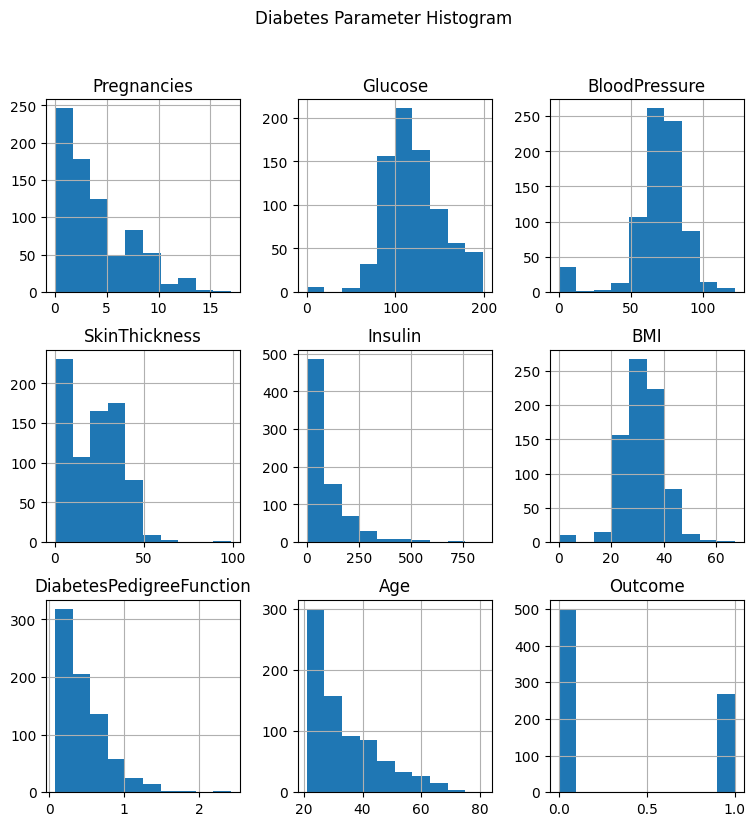

In [ ]:
diabetes_df.hist(figsize = (9,9))
plt.suptitle("Diabetes Parameter Histogram")

# **Data Preprocessing**

Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

diabetes_data_copy = diabetes_df.copy(deep = True)

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1)),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                 'BMI', 'DiabetesPedigreeFunction', 'Age'
                 ])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split

y = diabetes_data_copy.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("Train Set x-y:", X_train.shape, y_train.shape)
print("Test Set x-y:", X_test.shape, y_test.shape)

Train Set x-y: (652, 8) (652,)
Test Set x-y: (116, 8) (116,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model weights (coefficients):", model.coef_)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Model weights (coefficients): [[ 0.2953954   1.10427394 -0.25014019  0.06028255 -0.19317853  0.69501774
   0.24330995  0.35737851]]
Accuracy on test set: 75.86%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 68.10%


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')  # For linear kernel, or 'rbf' for non-linear
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 74.14%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 76.72%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 72.41%


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 78.45%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 71.55%


In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators=100,      # Equivalent to epochs: number of boosting rounds
    learning_rate=0.01,    # Learning rate
    max_depth=6,           # Max depth of trees
    subsample=0.8,         # Proportion of data used for each tree (stochasticity)
    colsample_bytree=0.8   # Proportion of features used for each tree
)

# Train the model
model.fit(X_train, y_train)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 71.55%
